# Исследование данных и Предобработка данных


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Загрузка данных
df = pd.read_csv('second_hand_car_sales.csv')

# Первичный осмотр данных
print('Первые пять строк датасета:\n\n',df.head())
print('\nСтруктура датасета:\n')
df.info()
print('\nХарактеристики числовых значений датасета:\n\n',df.describe())

Первые пять строк датасета:

     Manufacturer    Model  Engine Size (L) Fuel Type  Year of Manufacture  \
0  Mercedes-Benz    Cruze         1.418475  Electric                 2013   
1         Toyota       A4         4.492330  Electric                 2003   
2           Audi  C-Class         4.739375  Electric                 2000   
3         Nissan  Model 3         3.128423    Petrol                 2011   
4  Mercedes-Benz     Golf         1.650279    Diesel                 2006   

   Mileage  Price (£)  
0    61837      34792  
1   128993      27129  
2    81362      29141  
3   168204      24731  
4   119405      27493  

Структура датасета:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine Size (L)      50000 n

In [20]:
rows, columns = df.shape
print(f'Количество строк: {rows}')
print(f'Количество столбцов: {columns}')

print('\nНаименование столбцов: \n',df.columns)

Количество строк: 50000
Количество столбцов: 7

Наименование столбцов: 
 Index(['Manufacturer', 'Model', 'Engine Size (L)', 'Fuel Type',
       'Year of Manufacture', 'Mileage', 'Price (£)'],
      dtype='object')


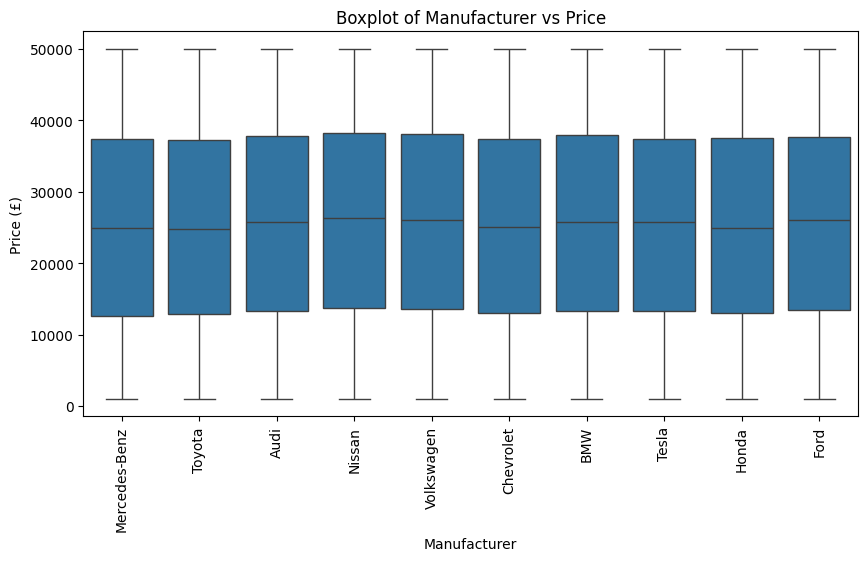

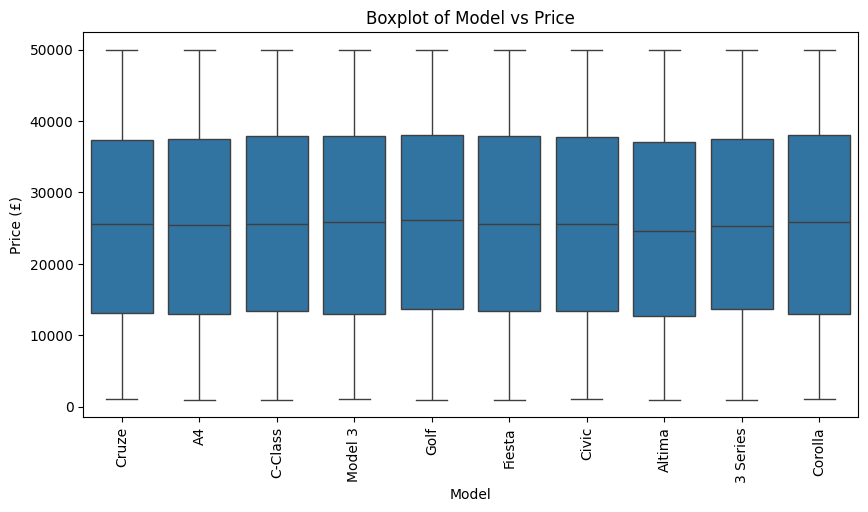

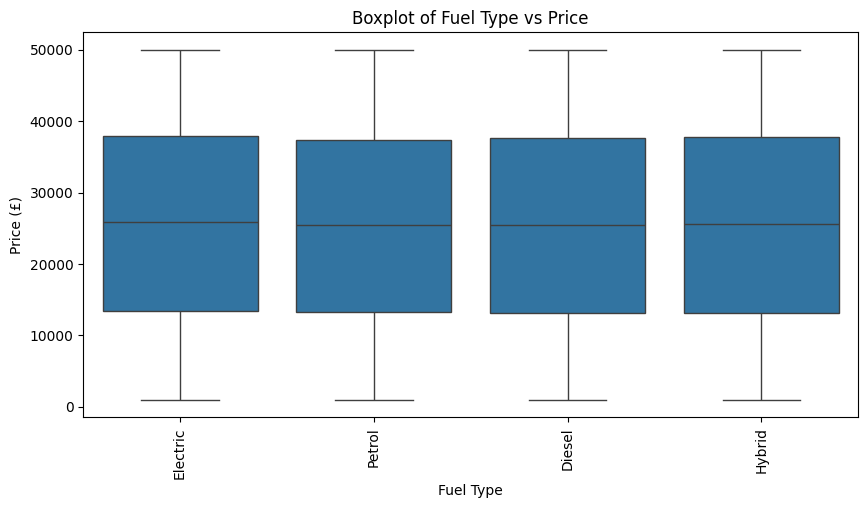

In [21]:
# Усы для категориальных данных

categorical_cols = ['Manufacturer', 'Model', 'Fuel Type']
for col in categorical_cols:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=col, y='Price (£)', data=df)
  plt.title(f'Boxplot of {col} vs Price')
  plt.xticks(rotation=90)
  plt.show()

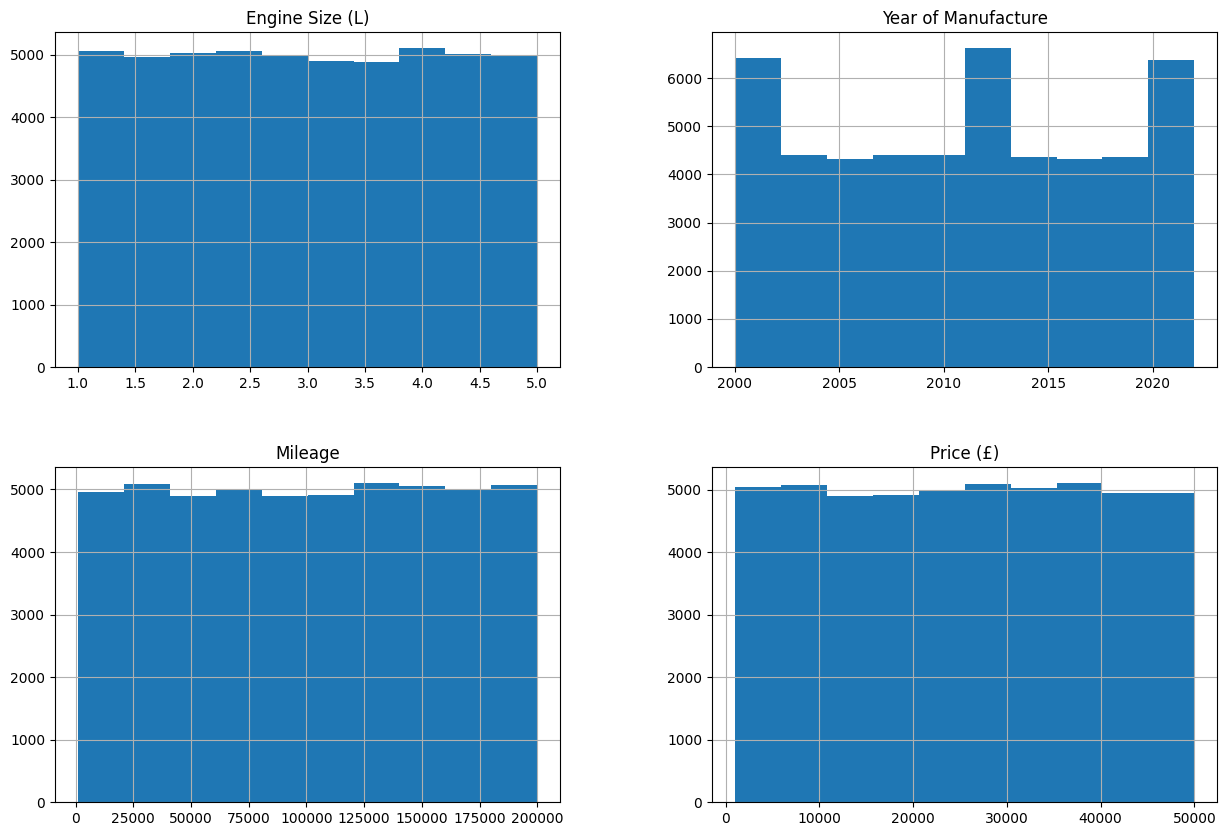

In [22]:
# Гистограммы распределения данных
df.hist(figsize=(15, 10))
plt.show()

In [3]:
# Нормализация данных
from sklearn.preprocessing import StandardScaler

numerical_features = df.select_dtypes(include=['number']).columns
numerical_features=numerical_features.tolist()

scaler = StandardScaler()
numeric_df = df.select_dtypes(include='number')
df_scaled = scaler.fit_transform(numeric_df)
df_scaled=pd.DataFrame(df_scaled,columns=[numerical_features])
df_drop = df.drop(columns=numerical_features)

#df_norm =pd.merge(df_scaled, df_drop,  left_index=True, right_index=True)
df_norm = pd.concat([df_drop,df_scaled], axis=1)
print('\nНормализованный датафрейм:\n')
df_norm.head()


Нормализованный датафрейм:



,Manufacturer,Model,Fuel Type,"(Engine Size (L),)","(Year of Manufacture,)","(Mileage,)","(Price (£),)"
0,Mercedes-Benz,Cruze,Electric,-1.364852,0.305618,-0.677262,0.659657
1,Toyota,A4,Electric,1.291786,-1.209038,0.489359,0.117439
2,Audi,C-Class,Electric,1.505299,-1.663435,-0.338078,0.259804
3,Nissan,Model 3,Petrol,0.113003,0.002687,1.170525,-0.052239
4,Mercedes-Benz,Golf,Diesel,-1.164512,-0.754641,0.322798,0.143195


In [4]:
# закодируем данные через LabelEncoder
from sklearn.preprocessing import LabelEncoder

category_df = df_norm.select_dtypes(include='object')
categorical_features = category_df.columns.tolist()

encoder_le = LabelEncoder()
for each in categorical_features:
    category_df[each] = encoder_le.fit_transform(category_df[each])
    category_df_check=encoder_le.classes_

numeric_df = df.select_dtypes(include='number')
new_df =pd.merge(numeric_df, category_df,  left_index=True, right_index=True)
print('\nПреобразованный датафрейм:\n')
new_df.head()



Преобразованный датафрейм:



,Engine Size (L),Year of Manufacture,Mileage,Price (£),Manufacturer,Model,Fuel Type
0,1.418475,2013,61837,34792,5,6,1
1,4.492330,2003,128993,27129,8,1,1
2,4.739375,2000,81362,29141,0,3,1
3,3.128423,2011,168204,24731,6,9,3
4,1.650279,2006,119405,27493,5,8,0


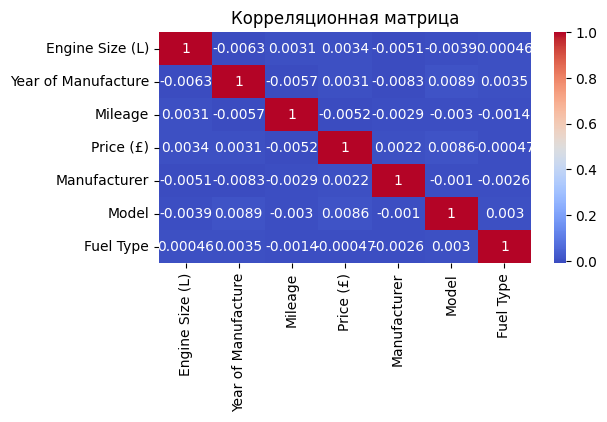

In [25]:
# Корреляционная матрица
plt.figure(figsize=(6, 3))
sns.heatmap(new_df.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [26]:
# Проверка на пропущенные значения
missing_values = new_df.isnull().sum()
print("Пропущенные значения в каждом столбце:\n\n", missing_values)

Пропущенные значения в каждом столбце:

 Engine Size (L)        0
Year of Manufacture    0
Mileage                0
Price (£)              0
Manufacturer           0
Model                  0
Fuel Type              0
dtype: int64


# Решение задачи сегментации

In [5]:
from sklearn.cluster import KMeans, DBSCAN, MeanShift, estimate_bandwidth, SpectralClustering, AgglomerativeClustering, OPTICS
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

#KMeans

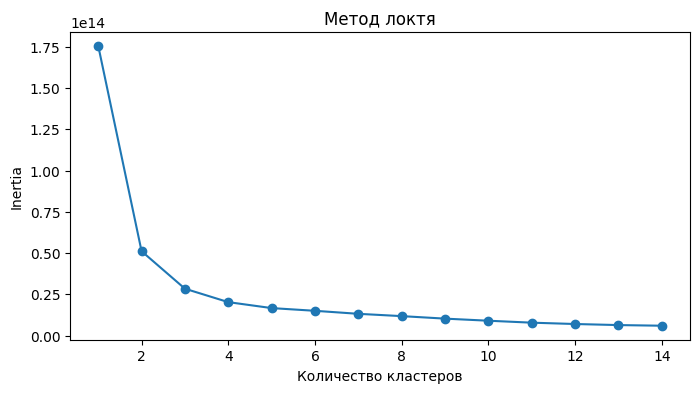

In [28]:
# Определение оптимального количества кластеров с использованием метода "локтя"
inertia = []
for n in range(1, 15):
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(new_df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 15), inertia, marker='o')
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.show()

Метрики качества:

 Silhouette Score: 0.37, Davies-Bouldin Index: 0.85, Inertia: 7782400370936.25, Calinski-Harabasz Index: 107841.64




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


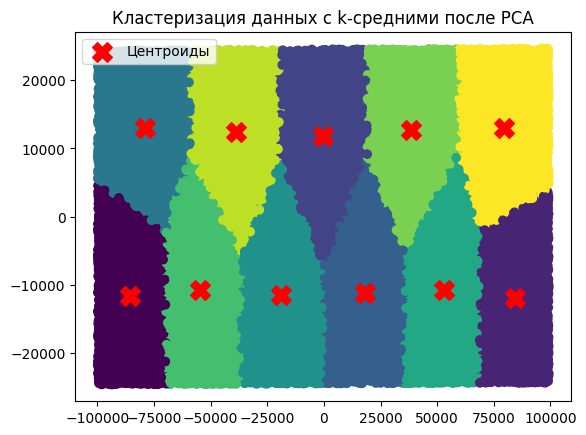

In [30]:
# Инициализируем модель KMeans с 11 кластерами
kmeans = KMeans(n_clusters=11, random_state=42)
y_kmeans = kmeans.fit_predict(new_df)

 # Оценка метрик
silhouette_avg = silhouette_score(new_df, y_kmeans)
davies_bouldin = davies_bouldin_score(new_df, y_kmeans)
inertia = kmeans.inertia_
calinski_harabasz = calinski_harabasz_score(new_df, y_kmeans)
print('Метрики качества:\n')
print(f" Silhouette Score: {silhouette_avg:.2f}, Davies-Bouldin Index: {davies_bouldin:.2f}, Inertia: {inertia:.2f}, Calinski-Harabasz Index: {calinski_harabasz:.2f}")
print('\n')

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df)

# Преобразование центров кластеров с использованием PCA
centroids_pca = pca.transform(kmeans.cluster_centers_)

# Визуализация кластеров после снижения размерности
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=200, c='red', label='Центроиды', marker='X')
plt.title('Кластеризация данных с k-средними после PCA')
plt.legend()
plt.show()

# Кластеризация со средним сдвигом.

Метрики качества:

Силуэтовская оценка: 0.43
Индекс Дэвиса-Болдуина: 0.76
Индекс Калински-Харабаса: 126713.27




/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


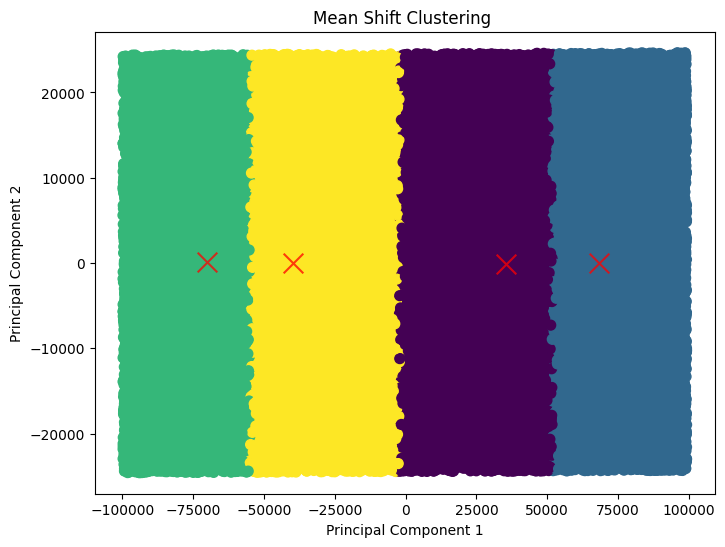

In [31]:
# Оценка ширины полосы пропускания (bandwidth) для алгоритма MeanShift
bandwidth = estimate_bandwidth(new_df, quantile=0.2, n_samples=500)

# Инициализируем модель с использованием алгоритма со средним сдвигом
mean_shift = MeanShift(bandwidth=bandwidth, bin_seeding=True)
mean_shift.fit(new_df)
y_shift = mean_shift.labels_
cluster_centers = mean_shift.cluster_centers_

# Вычисление метрик качества
silhouette_avg = silhouette_score(new_df, y_shift)
davies_bouldin = davies_bouldin_score(new_df, y_shift)
calinski_harabasz = calinski_harabasz_score(new_df, y_shift)

print('Метрики качества:\n')
print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")
print('\n')

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df)

# Визуализация исходных данных
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_shift, s=50, cmap='viridis')
cluster_centers_pca = pca.transform(cluster_centers)
plt.scatter(cluster_centers_pca[:, 0], cluster_centers_pca[:, 1], c='red', s=200, alpha=0.75, marker='x')
plt.title("Mean Shift Clustering ")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# Спектральная кластеризация.

Метрики качества:

Силуэтовская оценка: 0.34
Индекс Дэвиса-Болдуина: 0.88
Индекс Калински-Харабаса: 97130.93


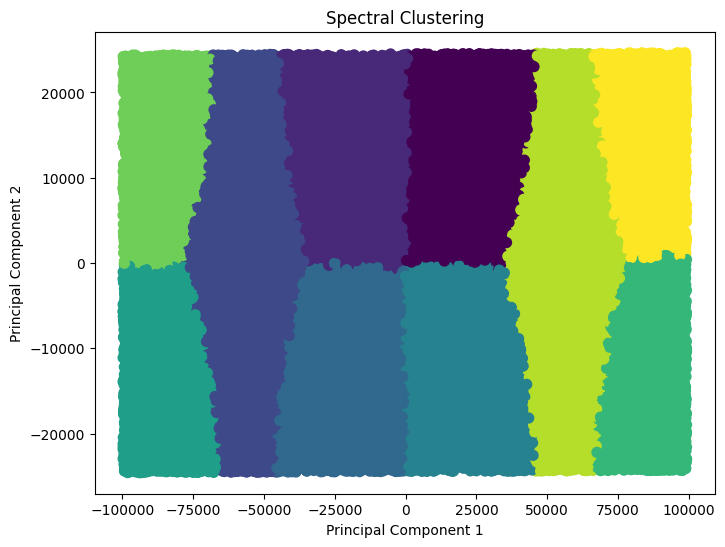

In [32]:
# Инициализируем модель спектральной кластеризации SpectralClustering
n_clusters = 10  # Устанавливаем количество кластеров
spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
y_spectral = spectral.fit_predict(new_df)

# Вычисление метрик качества
silhouette_avg = silhouette_score(new_df, y_spectral)
davies_bouldin = davies_bouldin_score(new_df, y_spectral)
calinski_harabasz = calinski_harabasz_score(new_df, y_spectral)

print('Метрики качества:\n')
print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")


# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df)

# Визуализация кластеров после спектральной кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_spectral, s=50, cmap='viridis')

plt.title("Spectral Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


# Агломеративная кластеризация

In [10]:
sample_data = new_df[:1000]  # Использование случайной выборки данных

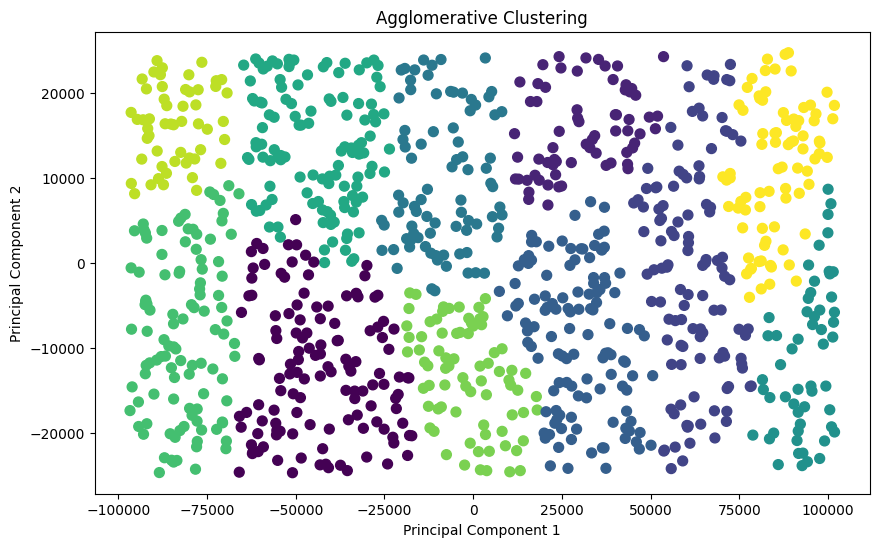

In [23]:
# Применение агломеративной кластеризации

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=3)
X_pca = pca.fit_transform(sample_data)

n_clusters = 11  # Устанавливаем количество кластеров
agg_clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='average') #(среднее расстояние)
y_Agg = agg_clustering.fit_predict(sample_data)


# Визуализация кластеров после агломеративной кластеризации
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_Agg, s=50, cmap='viridis')
plt.title("Agglomerative Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


In [24]:
# Вычисление метрик качества
silhouette_avg = silhouette_score(sample_data, y_Agg)
davies_bouldin = davies_bouldin_score(sample_data, y_Agg)
calinski_harabasz = calinski_harabasz_score(sample_data, y_Agg)

print('Метрики качества:\n')
print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

Метрики качества:

Силуэтовская оценка: 0.33
Индекс Дэвиса-Болдуина: 0.92
Индекс Калински-Харабаса: 1968.59


# Кластеризация на основе OPTICS

Метрики качества:

Силуэтовская оценка: 0.05
Индекс Дэвиса-Болдуина: 1.67
Индекс Калински-Харабаса: 13.20


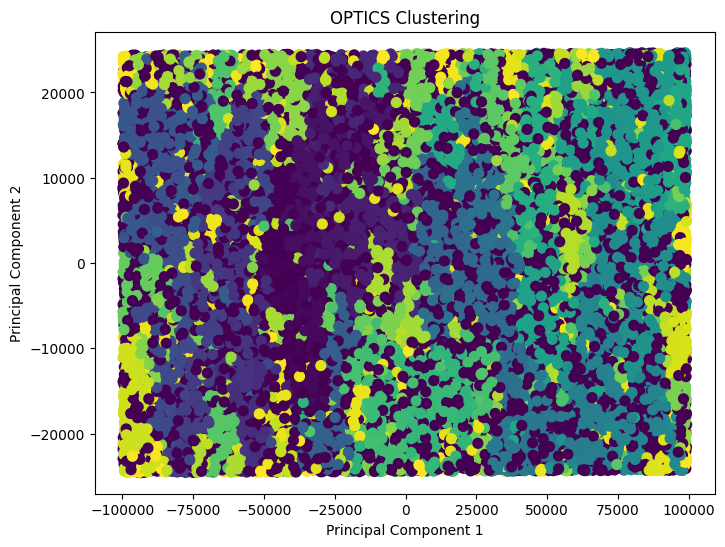

In [9]:
# Инициализируем модель с использованием OPTICS
optics = OPTICS(min_samples=3)
y_OPTICS = optics.fit_predict(new_df)

# Вычисление метрик качества
silhouette_avg = silhouette_score(new_df, y_OPTICS)
davies_bouldin = davies_bouldin_score(new_df, y_OPTICS)
calinski_harabasz = calinski_harabasz_score(new_df, y_OPTICS)

print('Метрики качества:\n')
print(f"Силуэтовская оценка: {silhouette_avg:.2f}")
print(f"Индекс Дэвиса-Болдуина: {davies_bouldin:.2f}")
print(f"Индекс Калински-Харабаса: {calinski_harabasz:.2f}")

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df)

# Визуализация кластеров после спектральной кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_OPTICS, s=50, cmap='viridis')

plt.title("OPTICS Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# DBSCAN плотностной алгоритм

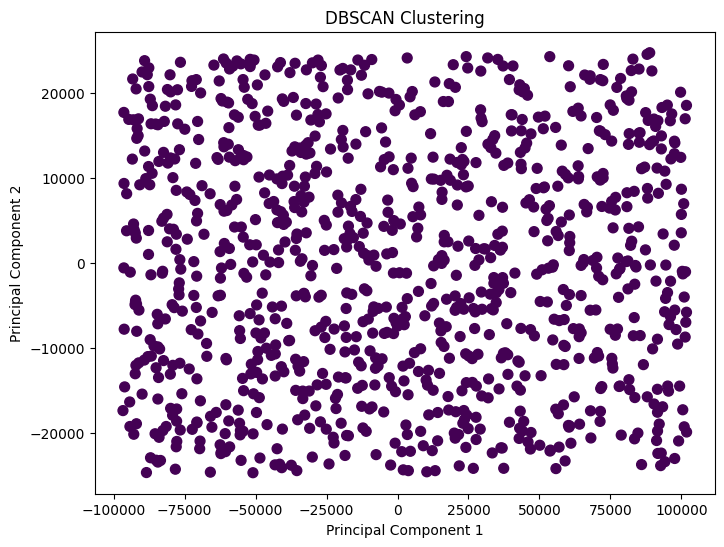

   Engine Size (L)  Year of Manufacture  Mileage  Price (£)  Manufacturer  \
0         1.418475                 2013    61837      34792             5   
1         4.492330                 2003   128993      27129             8   
2         4.739375                 2000    81362      29141             0   
3         3.128423                 2011   168204      24731             6   
4         1.650279                 2006   119405      27493             5   

   Model  Fuel Type  cluster  
0      6          1       -1  
1      1          1       -1  
2      3          1       -1  
3      9          3       -1  
4      8          0       -1  


<ipython-input-29-49df5e414e2a>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['cluster'] = y_dbscan


In [29]:
# Применение DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=8)
y_dbscan = dbscan.fit_predict(sample_data)

# Снижение размерности с использованием PCA для визуализации
pca = PCA(n_components=2)
X_pca = pca.fit_transform(sample_data)

# Визуализация кластеров после спектральной кластеризации
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_dbscan, s=50, cmap='viridis')

plt.title("DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Присвоение меток кластеров к исходному датасету
sample_data['cluster'] = y_dbscan

# Обзор результатов кластеризации
print(sample_data.head())